In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from problog.program import PrologString
from problog import get_evaluatable
%matplotlib inline
import os
def result(model:str):
    result = get_evaluatable().create_from(PrologString(model)).evaluate()
    print("ProbLog 推理结果：")
    for query_key, probability in result.items():
        print(f"{query_key} = {probability:.4f}")
    return

from groq import Groq
import os

api_key = "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"
client = Groq(
    api_key=api_key,
)


# Accident Dataset:

In [ ]:
dataset = '/Users/zhenzhili/MASTERTHESIS/datasets/#Traffic_dataset/US_Accidents_March23.csv'
us_accidents = pd.read_csv(dataset, nrows=200) # read the first 200 rows

In [10]:
us_accidents.iloc[:3]

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day


In [11]:
us_accidents.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [12]:
accd = us_accidents.iloc[0]
query = "accident(" + ", ".join([repr(accd[col]) for col in us_accidents.columns]) + ")"
print(query)

accident('A-1', 'Source2', np.int64(3), '2016-02-08 05:46:00', '2016-02-08 11:00:00', np.float64(39.865147), np.float64(-84.058723), np.float64(nan), np.float64(nan), np.float64(0.01), 'Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.', 'I-70 E', 'Dayton', 'Montgomery', 'OH', '45424', 'US', 'US/Eastern', 'KFFO', '2016-02-08 05:58:00', np.float64(36.9), np.float64(nan), np.float64(91.0), np.float64(29.68), np.float64(10.0), 'Calm', np.float64(nan), np.float64(0.02), 'Light Rain', np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, 'Night', 'Night', 'Night', 'Night')


# Data From DC


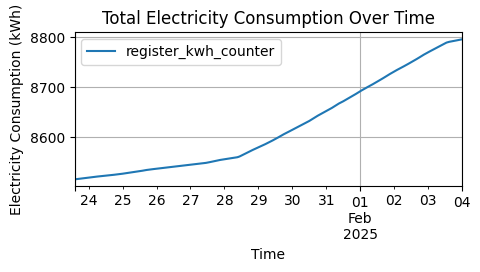

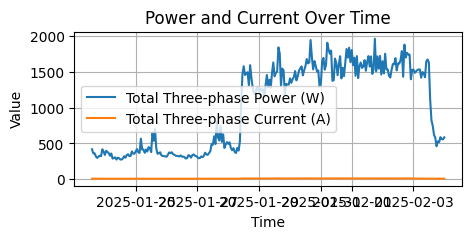

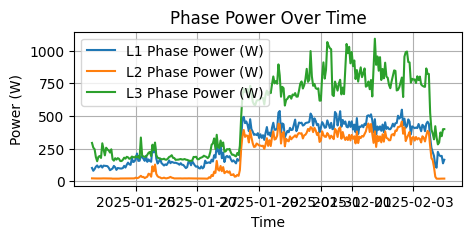

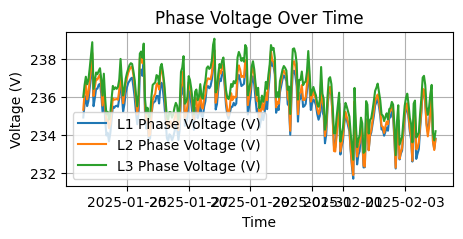

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
file_path = '/Users/zhenzhili/MASTERTHESIS/datasets/###Datacenter Dataset/response_1738669734109.json'
data = pd.read_json(file_path)

# Convert nested structure to DataFrame
df = pd.json_normalize(data['data'])

# Convert time encoding
df['time'] = pd.to_datetime(df['time'])

# Plot demonstration

# Plot 1: Total electricity consumption
df.plot(x='time', y='register_kwh_counter', kind='line', figsize=(5,2),title='Total Electricity Consumption Over Time', ylabel='Electricity Consumption (kWh)', xlabel='Time')
plt.grid(True)
plt.show()

# Plot 2: Total three-phase power and total current
plt.figure(figsize=(5, 2))
plt.plot(df['time'], df['register_l123_w'], label='Total Three-phase Power (W)')
plt.plot(df['time'], df['register_l123_a'], label='Total Three-phase Current (A)')
plt.title('Power and Current Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Power distribution of each phase
plt.figure(figsize=(5, 2))
plt.plot(df['time'], df['register_l1_w'], label='L1 Phase Power (W)')
plt.plot(df['time'], df['register_l2_w'], label='L2 Phase Power (W)')
plt.plot(df['time'], df['register_l3_w'], label='L3 Phase Power (W)')
plt.title('Phase Power Over Time')
plt.xlabel('Time')
plt.ylabel('Power (W)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 4: Stability of each phase voltage
plt.figure(figsize=(5, 2))
plt.plot(df['time'], df['register_l1_v'], label='L1 Phase Voltage (V)')
plt.plot(df['time'], df['register_l2_v'], label='L2 Phase Voltage (V)')
plt.plot(df['time'], df['register_l3_v'], label='L3 Phase Voltage (V)')
plt.title('Phase Voltage Over Time')
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau
df_filtered = df

# 计算相关系数
pearson_corr, _ = pearsonr(df_filtered["register_kwh_counter"], df_filtered["register_l123_w"])
spearman_corr, _ = spearmanr(df_filtered["register_kwh_counter"], df_filtered["register_l123_w"])
kendall_corr, _ = kendalltau(df_filtered["register_kwh_counter"], df_filtered["register_l123_w"])

    # # 绘制散点图和回归线
    # plt.figure(figsize=(3, 3))
    # sns.regplot(x=df_filtered["air_temperature"], y=df_filtered["wind_speed"], scatter_kws={"s": 50}, line_kws={"color": "red"})
    # plt.xlabel("Air Temperature (°C)")
    # plt.ylabel("Wind Speed (m/s)")
    # plt.title("Correlation Between Air Temperature and Wind Speed")
    # plt.show()

    # 显示相关系数
print(pearson_corr, spearman_corr, kendall_corr)


0.696471424098371 0.7761437927353511 0.5619376244193762


Q: CRAC Anomaly – Oscillatory Behavior（CRAC异常 - 振荡行为）
解释：计算机房空调（CRAC）设备工作状态波动，表现为温度、气流或功率的周期性变化，可能是控制系统问题。
异常表现：温度或湿度数据呈现周期性波动，而不是稳定趋势。
如何使用prolog进行异常的判断?
A: 如下model所示

In [ ]:
model = """ 
% CRAC Anomaly Detection - Oscillatory Behavior

% 1. Sensor Data Representation
% temperature(TimeStamp, Value).
temperature(1, 22.5).
temperature(2, 23.0).
temperature(3, 22.4).
temperature(4, 23.1).
temperature(5, 22.3).
temperature(6, 23.2).
temperature(7, 22.4).
temperature(8, 23.0).
temperature(9, 22.5).
temperature(10, 23.1).

% 2. Define Significant Fluctuation
% A significant fluctuation is defined as a change greater than 0.5 degrees.
significant_fluctuation(T1, T2) :-
    temperature(T1, V1),
    temperature(T2, V2),
    T2 is T1 + 1,  % Ensure only adjacent timestamps are compared
    Diff is abs(V1 - V2),
    Diff > 0.7.

% 3. Define Oscillatory Behavior
% Oscillatory behavior is detected if there is an alternating increase and decrease.
oscillatory_behavior(T1, T2, T3) :-
    significant_fluctuation(T1, T2),
    significant_fluctuation(T2, T3),
    T3 is T2 + 1,  % Ensure only adjacent timestamps are compared
    temperature(T1, V1),
    temperature(T2, V2),
    temperature(T3, V3),
    ((V1 < V2, V2 > V3); (V1 > V2, V2 < V3)).

% 4. Detect CRAC Anomaly
% If oscillatory behavior is detected consecutively, it is marked as a CRAC anomaly.
detect_crac_anomaly :-
    oscillatory_behavior(T1, T2, T3),
    oscillatory_behavior(T2, T3, T4),
    write('CRAC Anomaly Detected between times '), write(T1), write(' and '), write(T4), nl.

% 5. Query to Run Detection
query(detect_crac_anomaly).
"""

result(model)

CRAC Anomaly Detected between times 3 and 6
CRAC Anomaly Detected between times 4 and 7
ProbLog 推理结果：
detect_crac_anomaly = 1.0000


In [12]:
model = """ 
% 75 percent cpu load:

0.7::event(server_load_high).
0.2::event(server_load_medium).
0.1::event(server_load_low).

0.9::event(pue_increase).
0.8::event(temp_decrease).

% 事件Z（机房温度上升）在不同条件下的发生概率
0.8::before(room_temp_rise, server_load_high).
0.75::overlaps(room_temp_rise, pue_increase).

% 多事件联合推理
event(room_temp_rise) :- before(room_temp_rise, server_load_high), event(server_load_high).
event(room_temp_rise) :- overlaps(room_temp_rise, pue_increase), event(pue_increase).
query(event(room_temp_rise)).

anomaly(temp_not_decreasing) :- \+ event(temp_decrease).
query(anomaly(temp_not_decreasing)).


"""

result(model)

ProbLog 推理结果：
event(room_temp_rise) = 0.8570
anomaly(temp_not_decreasing) = 0.2000


# ASHRAE

In [ ]:
import pandas as pd

# Read the data
weather_train_csv = 'datasets/#ASHRAE-energy-prediction-dataset/weather_train.csv'
df_wt = pd.read_csv(weather_train_csv)
weather_site_0 = df_wt[df_wt["site_id"]==0]

building_train_csv = 'datasets/#ASHRAE-energy-prediction-dataset/train.csv'
df_bu = pd.read_csv(building_train_csv)
building_edu_0 = df_bu = df_bu[df_bu["building_id"]==0]

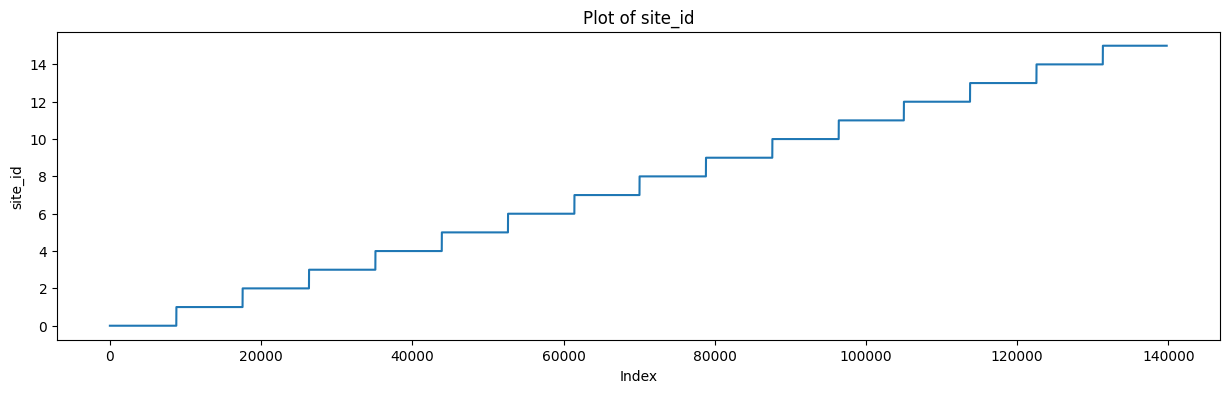

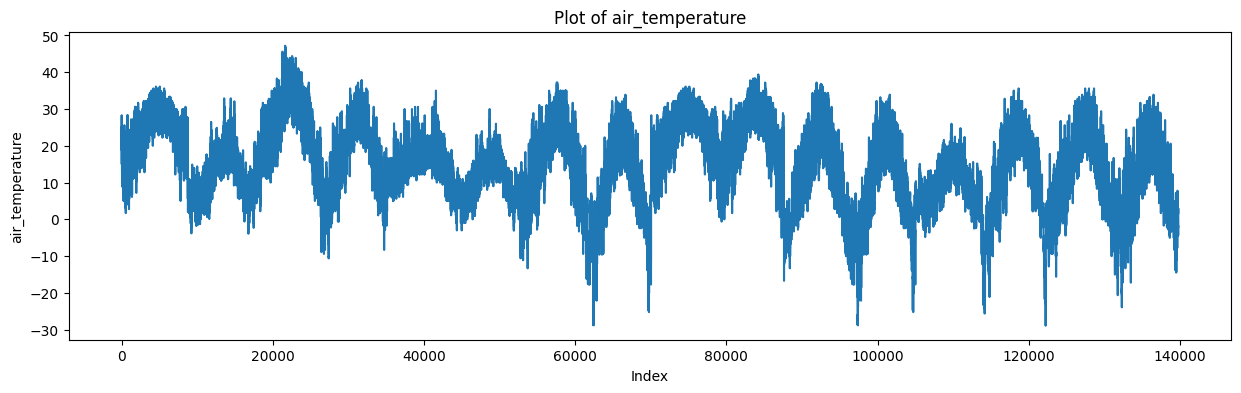

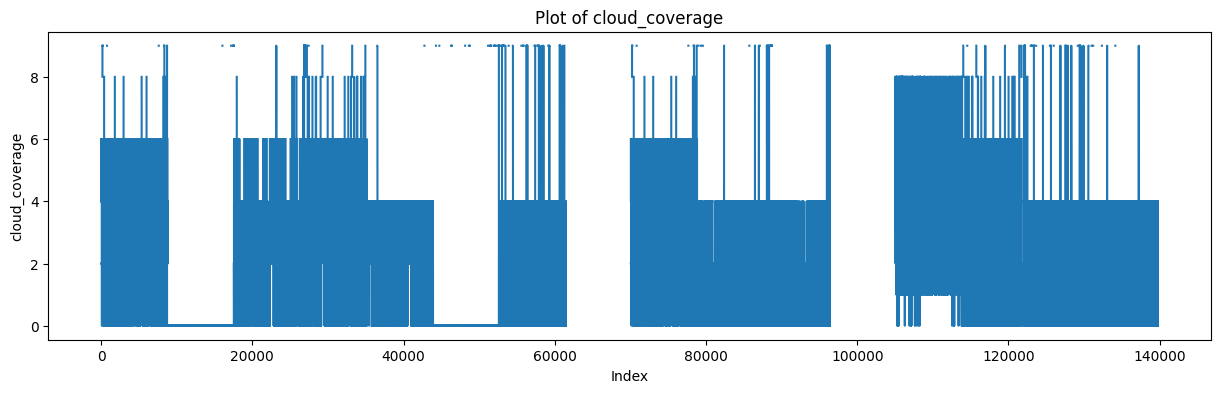

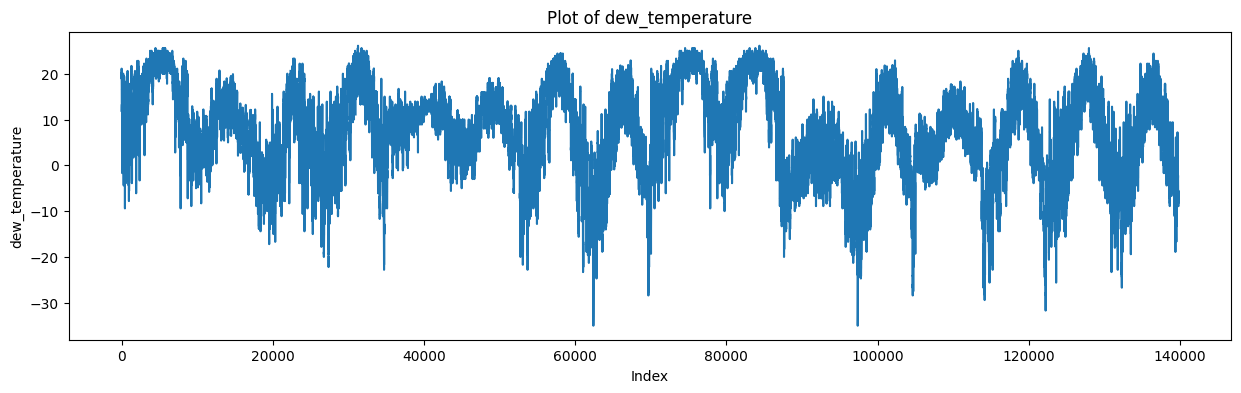

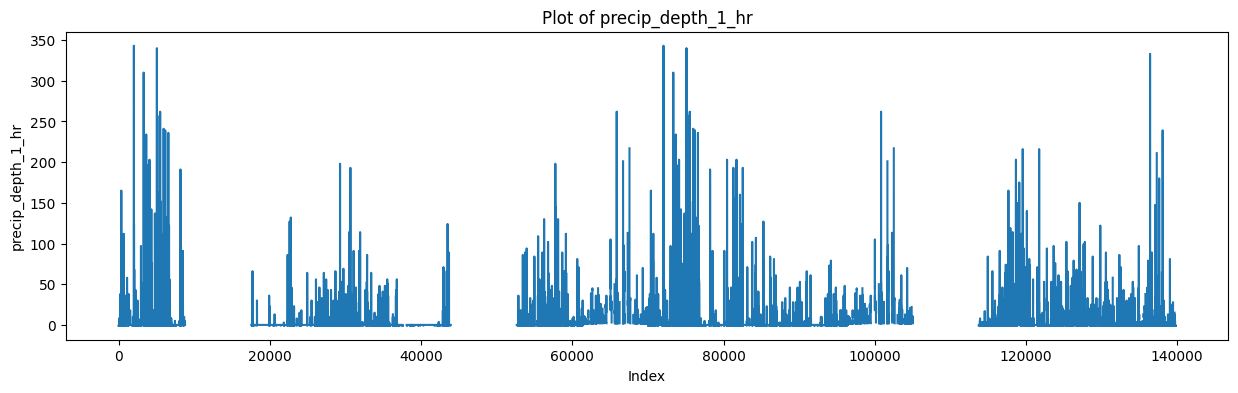

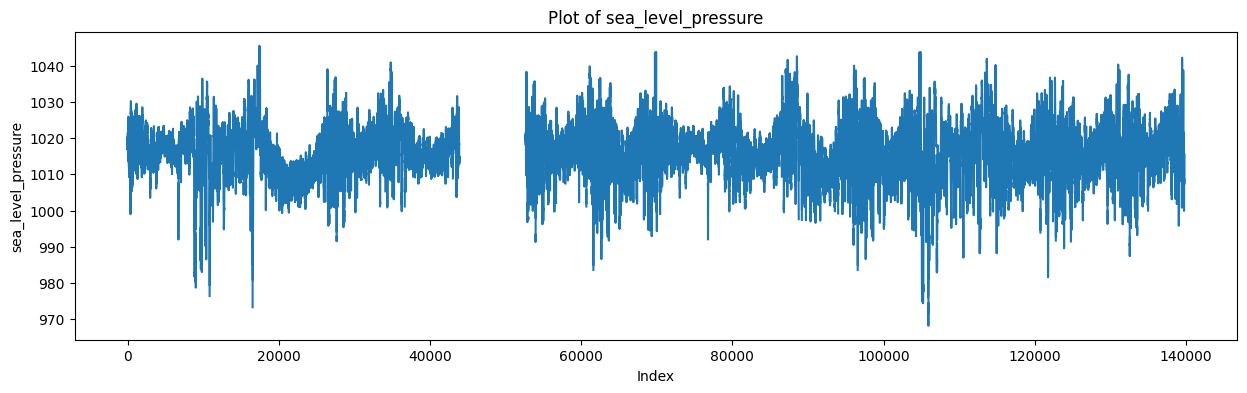

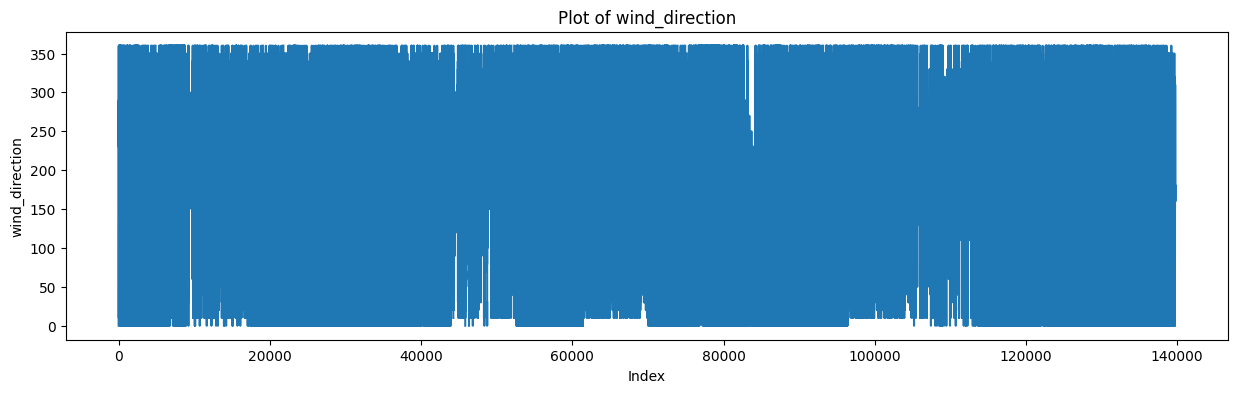

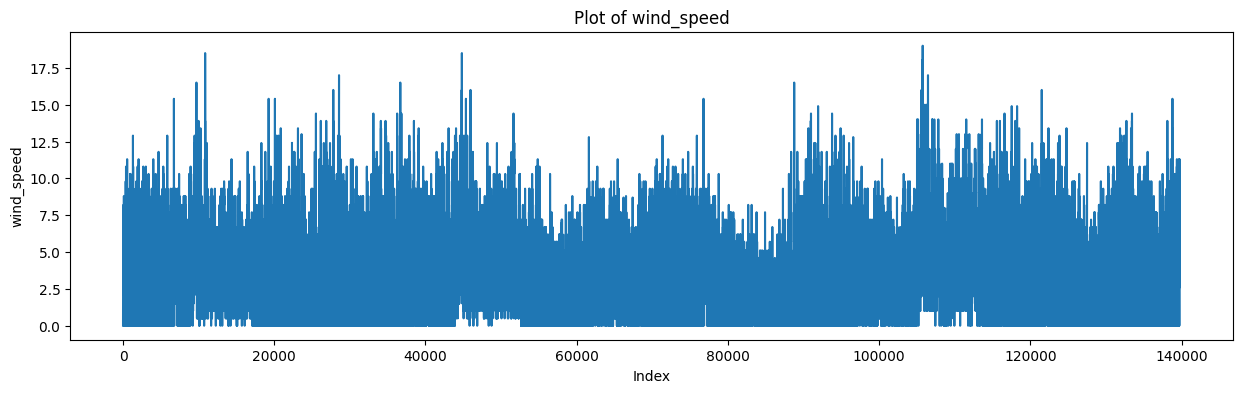

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# 过滤掉非数值列（如时间戳）
numeric_cols = df_wt.select_dtypes(include=['number']).columns

# 逐列绘制
for col in numeric_cols:
    plt.figure(figsize=(15, 4))
    plt.plot(df_wt.index, df_wt[col])
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.title(f"Plot of {col}")
    plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
weather_train_csv = 'datasets/#ASHRAE-energy-prediction-dataset/weather_train.csv'
df_wt = pd.read_csv(weather_train_csv)
df_wt = df_wt[df_wt["site_id"]==1]
df_wt["timestamp"] = pd.to_datetime(df_wt["timestamp"])


FileNotFoundError: [Errno 2] No such file or directory: 'datasets/#ASHRAE-energy-prediction-dataset/weather_train.csv'

In [49]:
date_filter = f"2017-01-01"
df_filtered = df_wt[df_wt["timestamp"].dt.date.astype(str) == date_filter]
df_selected = df_filtered[["timestamp", "air_temperature","wind_speed"]]
df_selected

,timestamp,air_temperature,wind_speed
17520,2017-01-01 00:00:00,6.7,5.1
17521,2017-01-01 01:00:00,6.2,3.6
17522,2017-01-01 02:00:00,6.0,4.6
17523,2017-01-01 03:00:00,5.7,3.6
17524,2017-01-01 04:00:00,5.6,4.1
17525,2017-01-01 05:00:00,5.5,2.6
17526,2017-01-01 06:00:00,5.9,3.1
17527,2017-01-01 07:00:00,6.4,3.1
17528,2017-01-01 08:00:00,6.7,2.6
17529,2017-01-01 09:00:00,7.3,3.1


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import linregress


# 将 timestamp 转换为 datetime 类型
data["timestamp"] = pd.to_datetime(data["timestamp"])

# 定义时间窗口（本例为数据的整个时间区间）
start_timestamp = data["timestamp"].min()
end_timestamp   = data["timestamp"].max()

# 用于存储结果的列表
results = []
# 假设传感器名称，这里统一用 "weather_station"，Item 则为各个测量指标名称
sensor = "weather_station"

# 对每个指标分别计算统计数据
for item in ["air_temperature", "wind_speed"]:
    series = data[item]
    
    # 计算标准差、均值、中位数、最大值、最小值
    std_val    = series.std()
    mean_val   = series.mean()
    median_val = series.median()
    max_val    = series.max()
    min_val    = series.min()
    
    # 计算斜率：将时间戳转换为相对于窗口起始时间的秒数作为 x 轴数据
    x = (data["timestamp"] - start_timestamp).dt.total_seconds().values
    y = series.values
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # 保存结果：将所有统计数据以 sensor_data 的格式组织
    results.append({
        "Sensor": sensor,
        "Item": item,
        "Start_timestamp": start_timestamp,
        "End_timestamp": end_timestamp,
        "Std_value": std_val,
        "Mean_value": mean_val,
        "Median_value": median_val,
        "Max_value": max_val,
        "Min_value": min_val,
        "Slope": slope
    })

# 打印结果，格式化输出为 sensor_data(…) 格式
for entry in results:
    print("sensor_data({Sensor}, {Item}, {Start_timestamp}, {End_timestamp}, {Std_value:.3f}, {Mean_value:.3f}, {Median_value:.3f}, {Max_value:.3f}, {Min_value:.3f}, {Slope:.6f})".format(**entry))


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau
for i in range(8):
    date_filter = f"2017-02-0{i+1}"
    # 创建数据框
    df_filtered = df_wt[df_wt["timestamp"].dt.date.astype(str) == date_filter]

    # 计算相关系数
    pearson_corr, _ = pearsonr(df_filtered["air_temperature"], df_filtered["wind_speed"])
    spearman_corr, _ = spearmanr(df_filtered["air_temperature"], df_filtered["wind_speed"])
    kendall_corr, _ = kendalltau(df_filtered["air_temperature"], df_filtered["wind_speed"])

    # # 绘制散点图和回归线
    # plt.figure(figsize=(3, 3))
    # sns.regplot(x=df_filtered["air_temperature"], y=df_filtered["wind_speed"], scatter_kws={"s": 50}, line_kws={"color": "red"})
    # plt.xlabel("Air Temperature (°C)")
    # plt.ylabel("Wind Speed (m/s)")
    # plt.title("Correlation Between Air Temperature and Wind Speed")
    # plt.show()

    # 显示相关系数
    print(pearson_corr, spearman_corr, kendall_corr)


-0.2793755159092534 -0.2543936219627496 -0.20742517575517483
0.6753491406968237 0.6727957465662384 0.5339026784950045
-0.07883095616141933 0.13807587961986967 0.11242421481071223
0.07742765009942676 0.15838982371737487 0.12373301987674669
0.1202902521246943 0.29929999095449455 0.21633948668167063
0.7040866644485498 0.6315167460619543 0.4536964357810802
0.19582765995051424 0.095869592425187 0.01978867711883092
-0.22052799248879038 -0.19182751676011658 -0.15517480613624873


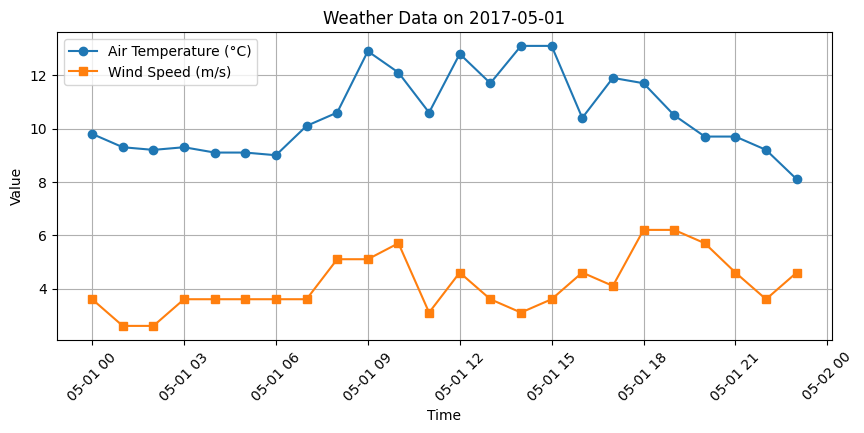

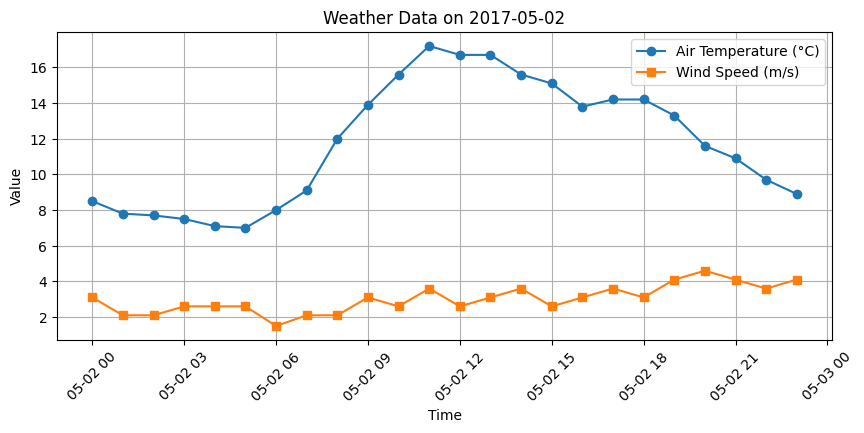

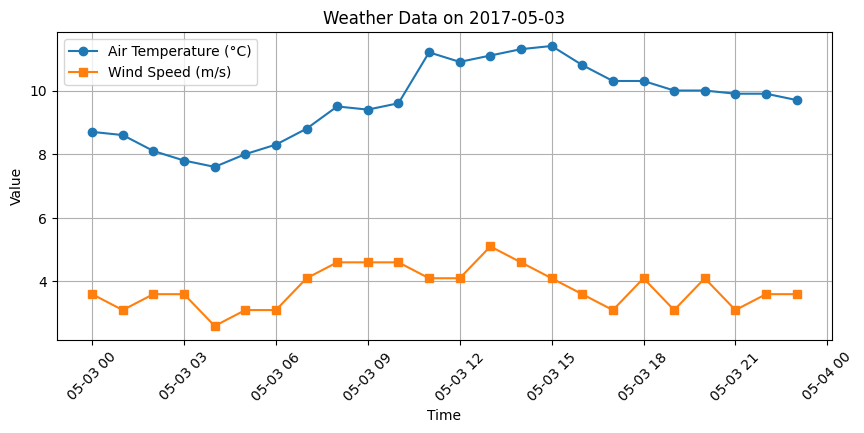

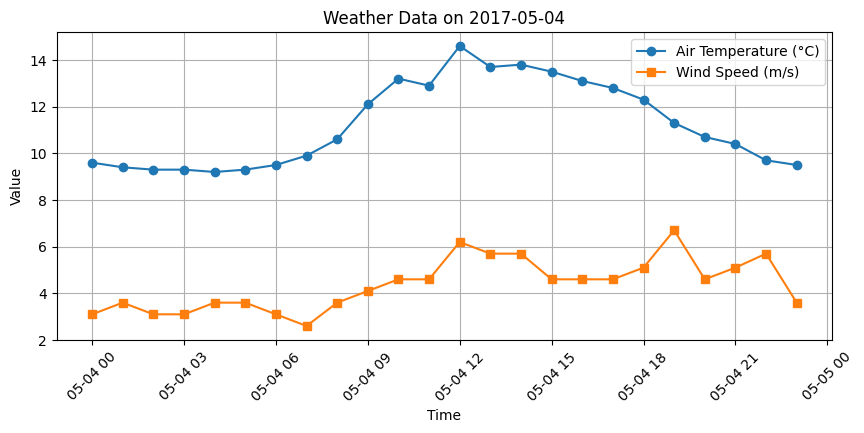

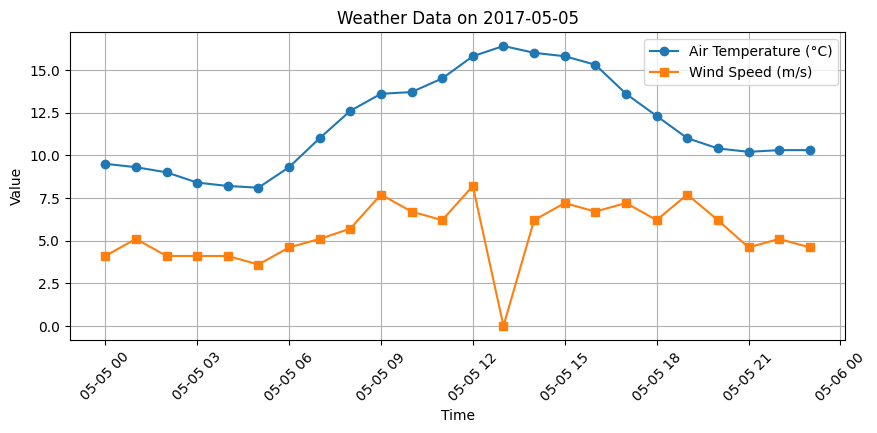

In [65]:
# 选择某一天的数据（例如 2016-01-01）

for i in range(5):
    if i <= 9:
        date_filter = f"2017-05-0{i+1}"
    else:
        date_filter = f"2017-01-{i+1}"
    df_filtered = df_wt[df_wt["timestamp"].dt.date.astype(str) == date_filter]

    # 画图
    plt.figure(figsize=(10, 4))

    plt.plot(df_filtered["timestamp"], df_filtered["air_temperature"], marker="o", label="Air Temperature (°C)")
    plt.plot(df_filtered["timestamp"], df_filtered["wind_speed"], marker="s", label="Wind Speed (m/s)")
    # plt.plot(df_filtered["timestamp"], df_filtered["sea_level_pressure"], marker="d", label="Sea Level Pressure (hPa)")

    # 图表设置
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"Weather Data on {date_filter}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()

    # 显示图表
    plt.show()


# KAG_energydata_complete

In [19]:
import pandas as pd
path = "/Users/zhenzhili/MASTERTHESIS/#Expert_System_Design/examples/Energy/data/KAG_energydata_complete.csv"

df = pd.read_csv(path, nrows=5000)

In [20]:
import numpy as np
arr = np.array(df["Appliances"])
print(arr.mean(), arr.std(), arr.min(), arr.max())

100.284 115.76458588013867 10 1080


In [ ]:
bins = [0, 100, 200, 300, 400, 500, 600]
counts = [0] * (len(bins))
for num in arr:
    for i in range(len(bins)):
        # 对于最后一个区间 [500,600]，采用闭区间：包含600
        if i < len(bins) - 1 and bins[i] <= num < bins[i+1]:
            counts[i] += 1
            break
        if i == len(bins) - 1 and num >= bins[i]:
            counts[i] += 1



print("各区间的计数:", counts)

各区间的计数: [3664, 753, 183, 202, 102, 42, 54]


we could classify them into several classes,